# DS 3000 - Assignment 6

**Student Name**: Olivia Simpson

**Date**: 10/11/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

TODO: Load the attached data into a pandas dataframe: diamonds.csv
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.comLinks to an external site.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

diamonds_df = pd.read_csv('diamonds.csv')
diamonds_df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

## Question 2: 
TODO: Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.
Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.

In [7]:
# statistical summary for variable, carat 
diamonds_df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [9]:
# statistical summary for variable, depth
diamonds_df['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

## Question 3: 
TODO: Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

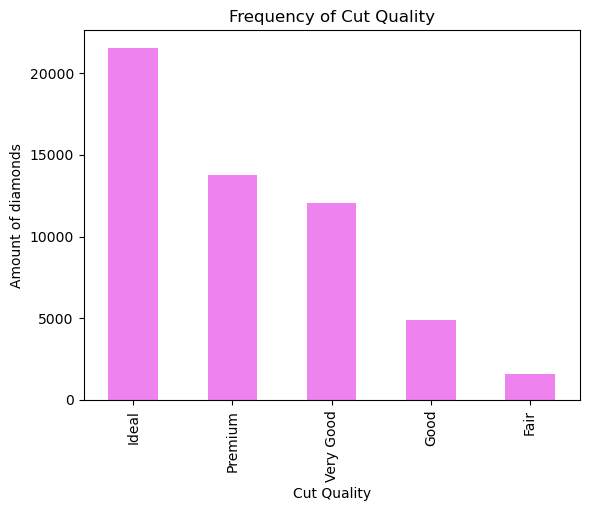

In [147]:
# counts the amount for each type of cut quality 
cut_counts = diamonds_df['cut'].value_counts()

# visualizes the data 
cut_counts.plot(kind='bar', color='violet')
plt.xlabel('Cut Quality')
plt.ylabel('Amount of diamonds')
plt.title('Frequency of Cut Quality')
plt.show()

Explanation: The chart is a bar chart with cut quality on the x-axis and amount of diamonts / frequency on the y-axis. 
Results: We see the largest amount of ideal quality diamonds, with a frequency of over 20,000, and the smallest amount of fair quality diamonds, with a frequency of around 2,000. 

## Question 4: 
TODO: Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

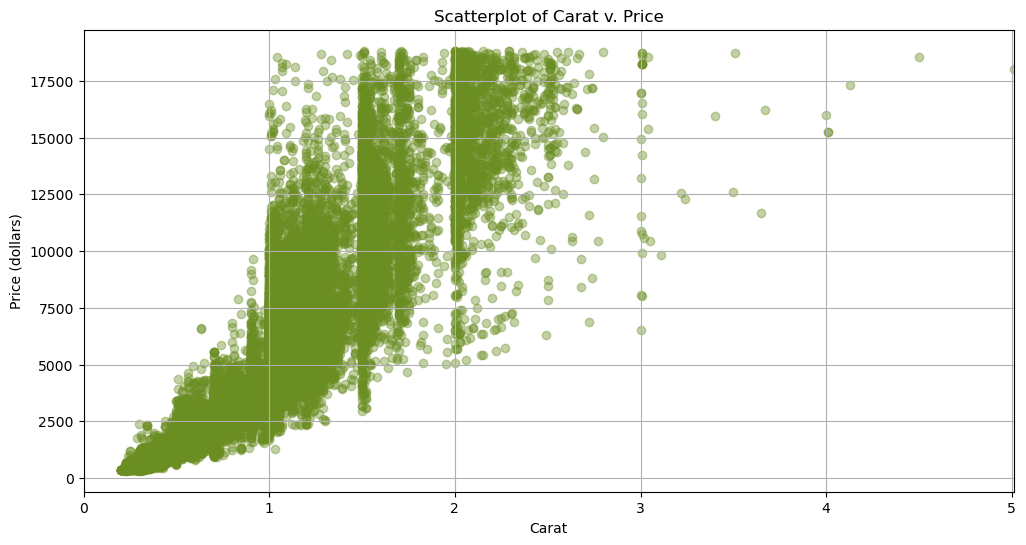

In [149]:
# visualizes relationship between carat and price 
plt.figure(figsize=(12,6))
plt.scatter(diamonds_df['carat'], diamonds_df['price'], alpha=0.4, color='olivedrab')
plt.title('Scatterplot of Carat v. Price')
plt.xlabel('Carat')
plt.ylabel('Price (dollars)')
plt.xlim(0, diamonds_df['carat'].max())
plt.grid(True)
plt.show()

Explanation: in the chart the x-axis represents the carat weight and the y-axis represents the price in dolors. Each point corresponds to a diamond in the data. 
The two variables have a positive correlation, where as carat increases, price increases. There is, however, variability in price for diamonds of the same carat weights, which suggest other factors are also impacting the price of a diamond. There are a couple outliers of diamonds with higher carat weights that seem to be priced too low. 

## Question 5: 
TODO: Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [61]:
from scipy.stats import pearsonr

corr, _ = pearsonr(diamonds_df['carat'], diamonds_df['price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.922


Results: the value is positive which indicates a positive correlation between the 2 variables. The value is also closer to 1, which indicates a strong correlation. This strong correlation siggests that larger carat weights tend to be associated with higher prices. However, we saw some outliers in a graph, so we should be cautious of drawing any conclusions right away. 

## Question 6: 
TODO: Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

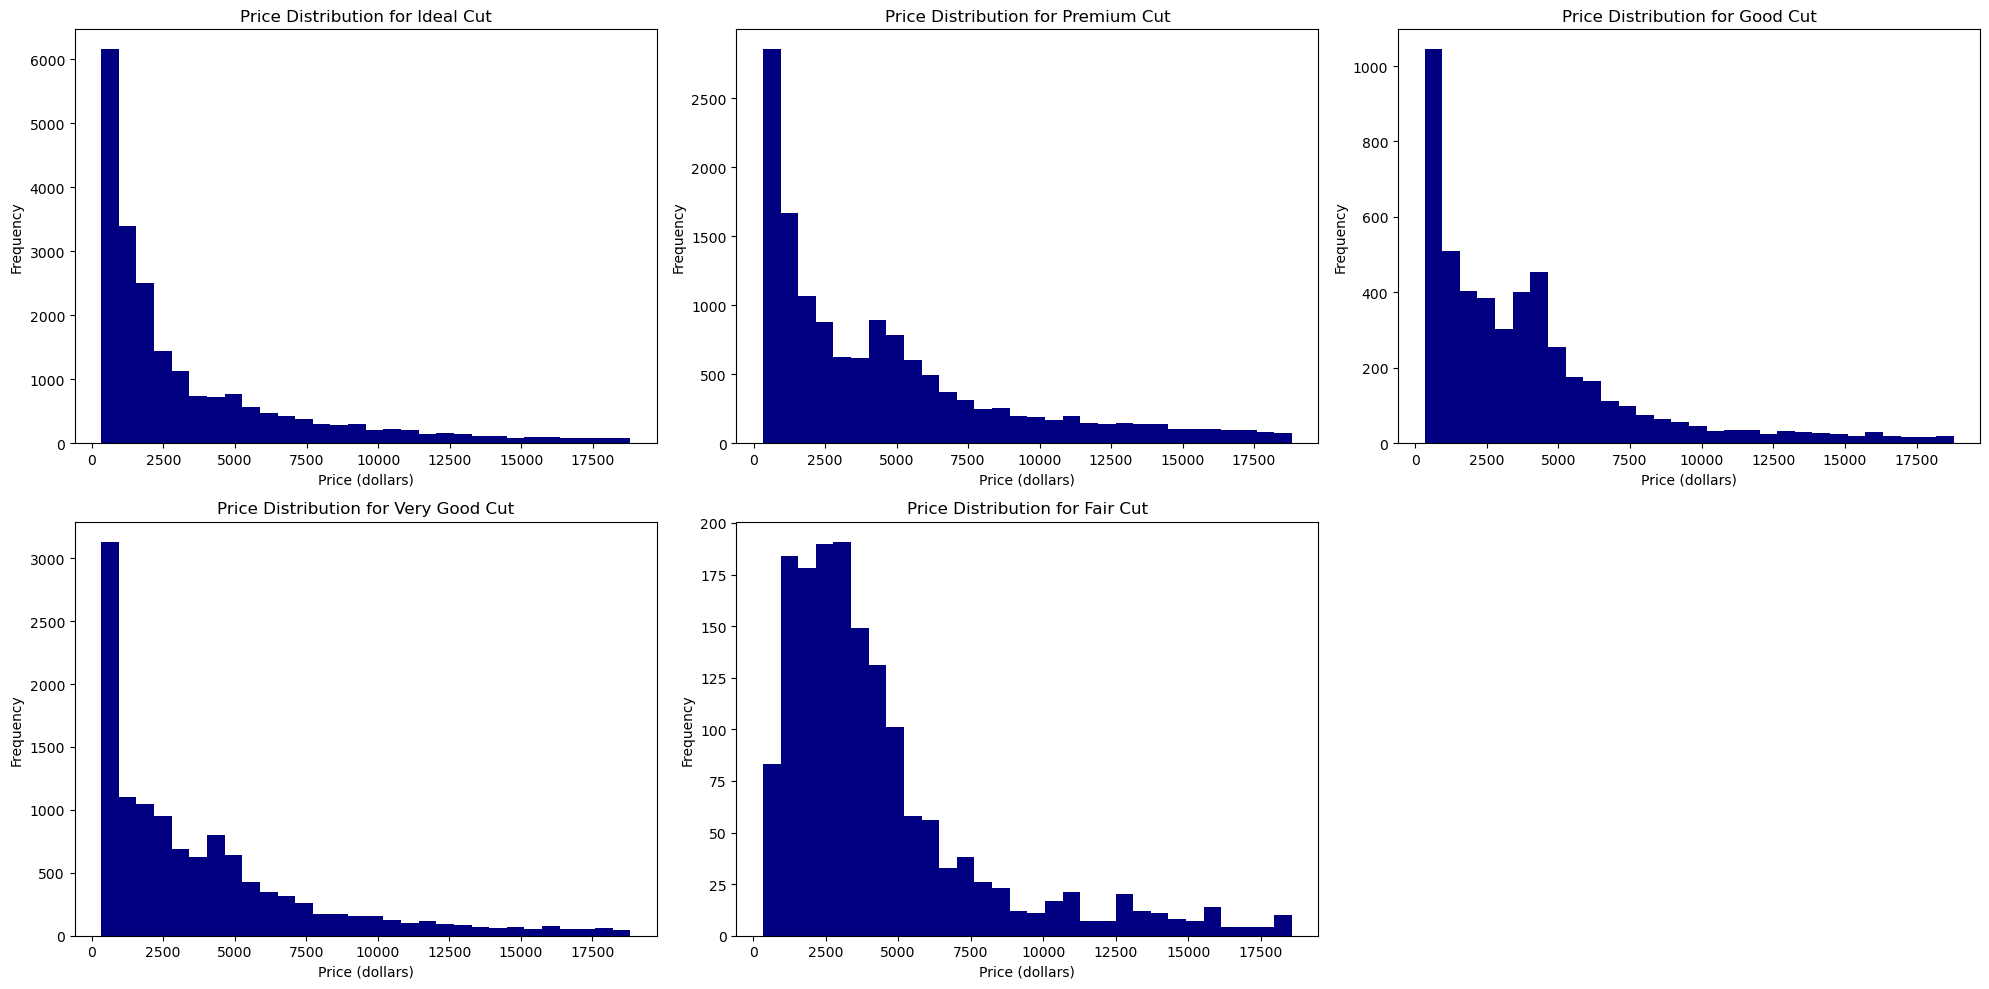

In [79]:
cut_quality = diamonds_df['cut'].unique()
num_cuts = len(cut_quality)

plt.figure(figsize=(20,10))

for i, cut in enumerate(cut_quality):
    plt.subplot(2, 3, i + 1)
    plt.hist(diamonds_df[diamonds_df['cut'] == cut]['price'], bins=30, color='navy')
    plt.title(f'Price Distribution for {cut} Cut')
    plt.xlabel('Price (dollars)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

For all the charts, we see a signigicant skew, with all charts having a tail extending to the right side of the graph. For each chart, we, typically, see the highest frequency of diamonds for the bin closest to 0, indicating that most diamonds are being sold between 0 to 2500 dollars, no matter the quality of the cut. The only difference is seen for the fair cut, which sees most diamonds being sold around $3000. An explanation to this issue, is that there is the smallest frequency of diamonds for the fair quality, with the largest frequency being around 180 diamonds. This is significantly different than the other charts which see highest frequencies anywhere from 1000 to 6000 diamonds. 

## Question 7: 
TODO: Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

In [140]:
from scipy.stats import ttest_ind

# new data set with prices for only good quality diamonds 
good_prices = diamonds_df[diamonds_df['cut'] == 'Good']['price']

# new data set with prices for only very good quality diamonds 
very_prices = diamonds_df[diamonds_df['cut'] == 'Very Good']['price']

# finds the t-stat and p-value for good v. very good 
t_stat_good, p_value_good = ttest_ind(good_prices, very_prices)

# new data set with prices for only premium quality diamonds 
premium_prices = diamonds_df[diamonds_df['cut'] == 'Premium']['price']

# new data set with prices for only ideal quality diamonds 
ideal_prices = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']

# finds the t-stat and p-value for premium v. ideal 
t_stat_premium, p_value_premium = ttest_ind(premium_prices, ideal_prices)

alpha = 0.05 

# prints findings 
print(f"Good vs Very Good: T-Statistic = {t_stat_good}, P-Value = {p_value_good}")
if p_value_good < alpha: 
    print("Reject the null hypothesis: there is a significant difference in prices.")
else:
    print("Fail to reject the null: No significant difference in prices.")

print(f"Premium vs Ideal: T-Statistic = {t_stat_premium}, P-Value = {p_value_premium}")
if p_value_premium < alpha: 
    print("Reject the null hypothesis: there is a significant difference in prices.")
else:
    print("Fail to reject the null: No significant difference in prices.")

Good vs Very Good: T-Statistic = -0.8085850944660599, P-Value = 0.41876516590101354
Fail to reject the null: No significant difference in prices.
Premium vs Ideal: T-Statistic = 25.650910588183198, P-Value = 8.585274269295433e-144
Reject the null hypothesis: there is a significant difference in prices.


## Question 8: 
TODO: Many statistical test rely on the assumption that data is normally distributed. Indicate which distributions in question 6 were skewed, and research one possible technique* that can be used to handle skewed data. Then perform the following:
Demonstrate the selected technique to correct the skewed data.
Repeat the analysis in question 6 using the corrected data and explain the difference in the distribution with the previous results.
Repeat the statistical tests in question 7. Are there any changes in the statistical significance? Explain the results.

In [105]:
import seaborn as sns
from scipy.stats import yeojohnson, skew 

# new data set with prices for only fair quality diamonds 
fair_prices = diamonds_df[diamonds_df['cut'] == 'Fair']['price']

#finds the skew for the different cut quality types 
skew_dict = {}
skew_dict['fair'] = fair_prices.skew()
skew_dict['good'] = good_prices.skew()
skew_dict['very good'] = very_prices.skew()
skew_dict['premium'] = premium_prices.skew()
skew_dict['ideal'] = ideal_prices.skew()
skew_dict

{'fair': 1.7835349276144863,
 'good': 1.7229961505199325,
 'very good': 1.5957376344562817,
 'premium': 1.3336479780929593,
 'ideal': 1.8358427167505051}

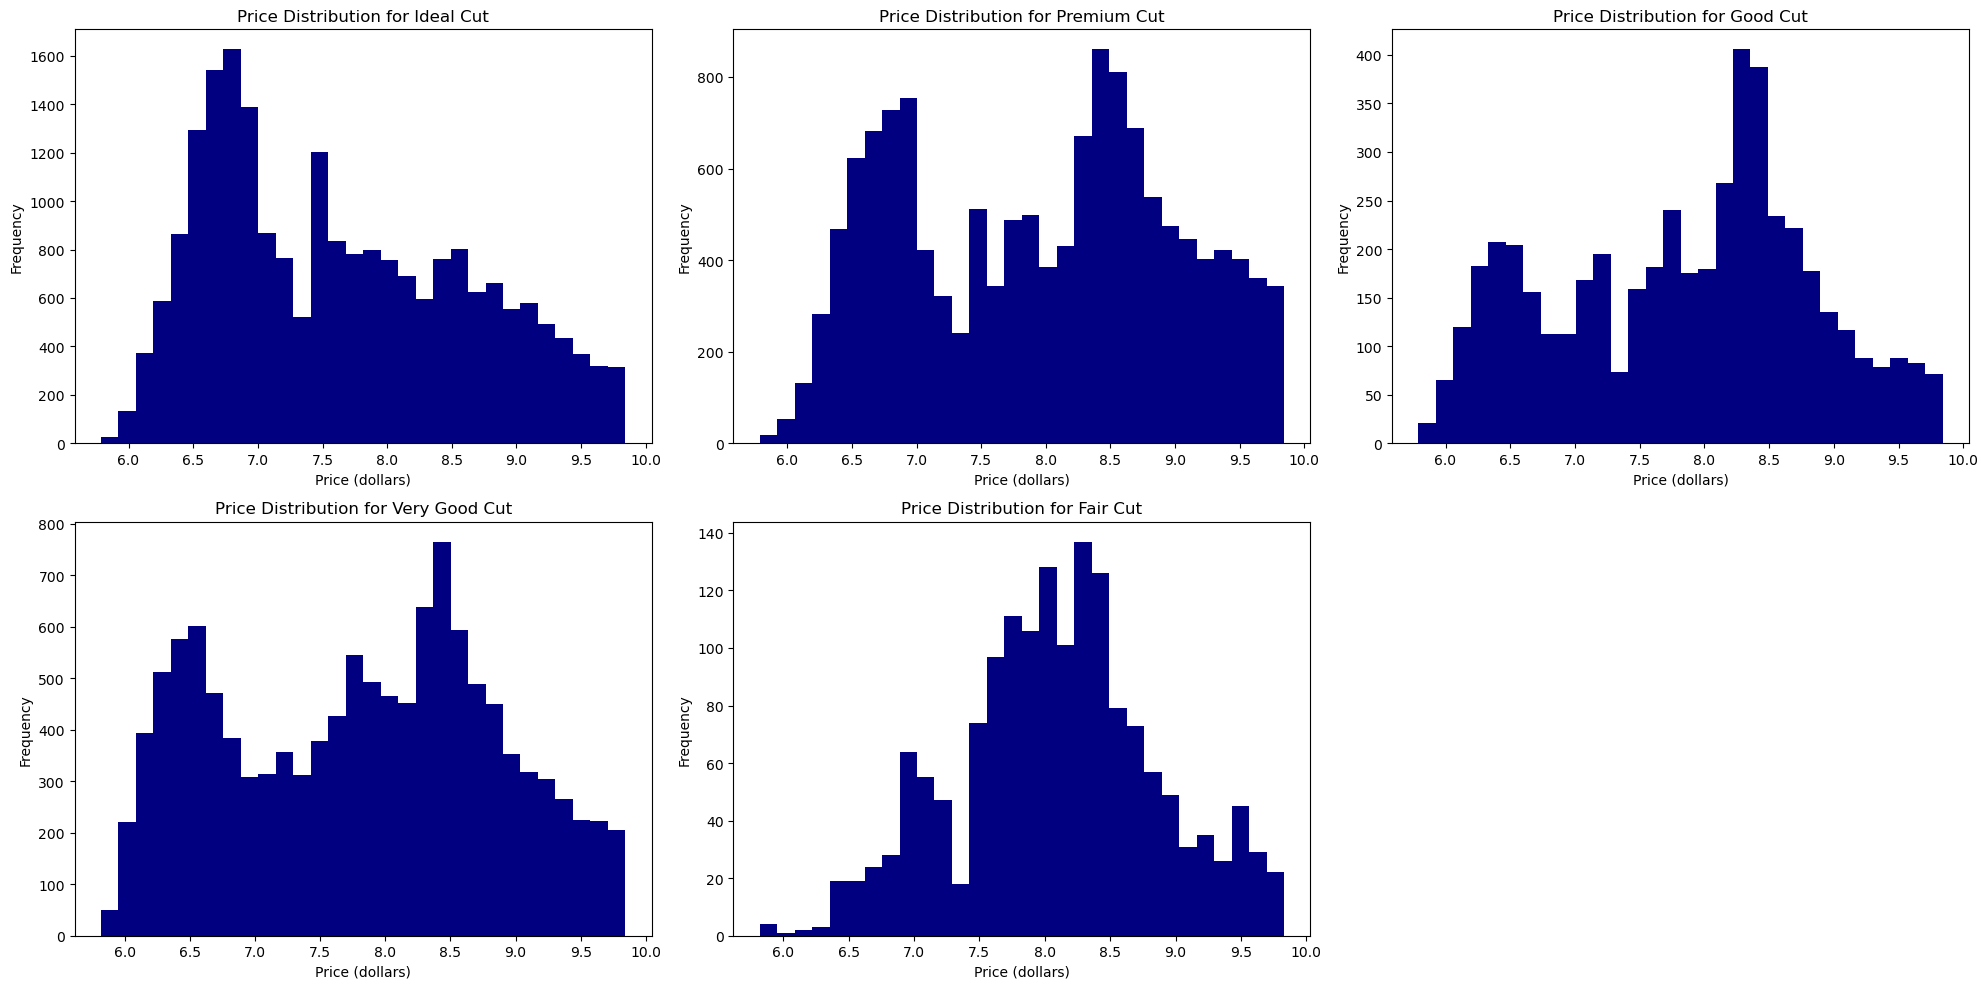

In [127]:
# visualizes new histograms, use the log function to decrease skewness 
cut_quality = diamonds_df['cut'].unique()
num_cuts = len(cut_quality)

plt.figure(figsize=(20,10))

for i, cut in enumerate(cut_quality):
    plt.subplot(2, 3, i + 1)
    plt.hist(np.log(diamonds_df[diamonds_df['cut'] == cut]['price']), bins=30, color='navy')
    plt.title(f'Price Distribution for {cut} Cut')
    plt.xlabel('Price (dollars)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [131]:
# checks new skewness from the np.log 
skew_dict = {}
skew_dict['fair'] = np.log(fair_prices).skew()
skew_dict['good'] = np.log(good_prices).skew()
skew_dict['very good'] = np.log(very_prices).skew()
skew_dict['premium'] = np.log(premium_prices).skew()
skew_dict['ideal'] = np.log(ideal_prices).skew()
skew_dict

{'fair': -0.04040385452627696,
 'good': -0.1565199946711657,
 'very good': -0.032948216036786986,
 'premium': -0.041775351310762425,
 'ideal': 0.39585264221602195}

In [133]:
# runs problem 7 again, but this time using np.log to decrease skewness 
good_prices = diamonds_df[diamonds_df['cut'] == 'Good']['price']
very_prices = diamonds_df[diamonds_df['cut'] == 'Very Good']['price']
t_stat_good, p_value_good = ttest_ind(np.log(good_prices), np.log(very_prices))

premium_prices = diamonds_df[diamonds_df['cut'] == 'Premium']['price']
ideal_prices = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']
t_stat_premium, p_value_premium = ttest_ind(np.log(premium_prices), np.log(ideal_prices))

alpha = 0.05 

print(f"Good vs Very Good: T-Statistic = {t_stat_good}, P-Value = {p_value_good}")
if p_value_good < alpha: 
    print("Reject the null hypothesis: there is a significant difference in prices.")
else:
    print("Fail to reject the null: No significant difference in prices.")

print(f"Premium vs Ideal: T-Statistic = {t_stat_premium}, P-Value = {p_value_premium}")
if p_value_premium < alpha: 
    print("Reject the null hypothesis: there is a significant difference in prices.")
else:
    print("Fail to reject the null: No significant difference in prices.")

Good vs Very Good: T-Statistic = 2.552635164323948, P-Value = 0.01069980968514243
Reject the null hypothesis: there is a significant difference in prices.
Premium vs Ideal: T-Statistic = 28.34476921762545, P-Value = 8.823666358628614e-175
Reject the null hypothesis: there is a significant difference in prices.


By decreasing the skew, we have changed our results from 7. Now in both cases, there is a signigicant difference in prices. When decreasing the skew of each graph, we made the extreme values less extreme and pulled the mean closer to the median. Therefore, this indicates that the quality of the diamonds always had a significant difference in price, but by decreasing the skew, we can more accurately see it. 


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.

- https://www.statology.org/paired-samples-t-test-r/#:~:text=How%20to%20Conduct%20a%20Paired%20t%2Dtest%20%C2%B7,the%20mean%20difference%20(d)%20%C2%B7%20Calculate%20the
- https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/